In [3]:
pip install opencv-python tqdm scikit-learn tensorflow ipywidgets pillow matplotlib seaborn

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 660.6 kB/s eta 0:00:59
   ---------------------------------------- 0.1/38.6 MB 1.3 MB/s eta 0:00:30
   ---------------------------------------- 0.2/38.6 MB 1.6 MB/s eta 0:00:25
   ---------------------------------------- 0.4/38.6 MB 2.0 MB/s eta 0:00:19
    --------------------------------------- 0.5/38.6 MB 2.3 MB/s eta 0:00:17
    --------------------------------------- 0.7/38.6 MB 2.7 MB/s eta 0:00:15
    --------------------------------------- 0.9/38.6 MB 2.8 MB/s eta 0:00:14
   - -------------------------------------- 1.1/38.6 MB 3.1 MB/s eta 0:00:12
   - -------------------------------------- 1.4/38.6 MB 3.4 MB/s eta 0:00:12
   - ---------

In [9]:
import os
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [5]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [10]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('../BrainTumor/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('../BrainTumor/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)


In [11]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [13]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [14]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))

model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [25]:
from keras.callbacks import EarlyStopping

# Define early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Add early stopping to the fit function
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1, callbacks=[early_stop])

Epoch 1/20
83/83 [==============================] - 113s 1s/step - loss: 0.1109 - accuracy: 0.9629 - val_loss: 0.2582 - val_accuracy: 0.9116
Epoch 2/20
83/83 [==============================] - 130s 2s/step - loss: 0.1301 - accuracy: 0.9565 - val_loss: 0.2939 - val_accuracy: 0.8844
Epoch 3/20
83/83 [==============================] - 122s 1s/step - loss: 0.1193 - accuracy: 0.9584 - val_loss: 0.3227 - val_accuracy: 0.8912
Epoch 4/20
83/83 [==============================] - 118s 1s/step - loss: 0.1293 - accuracy: 0.9554 - val_loss: 0.2546 - val_accuracy: 0.9048
Epoch 5/20
83/83 [==============================] - 123s 1s/step - loss: 0.1057 - accuracy: 0.9686 - val_loss: 0.3356 - val_accuracy: 0.8810
Epoch 6/20
83/83 [==============================] - 131s 2s/step - loss: 0.0968 - accuracy: 0.9644 - val_loss: 0.2765 - val_accuracy: 0.9116
Epoch 7/20
83/83 [==============================] - 126s 2s/step - loss: 0.0914 - accuracy: 0.9686 - val_loss: 0.2931 - val_accuracy: 0.9184
Epoch 8/20
83

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

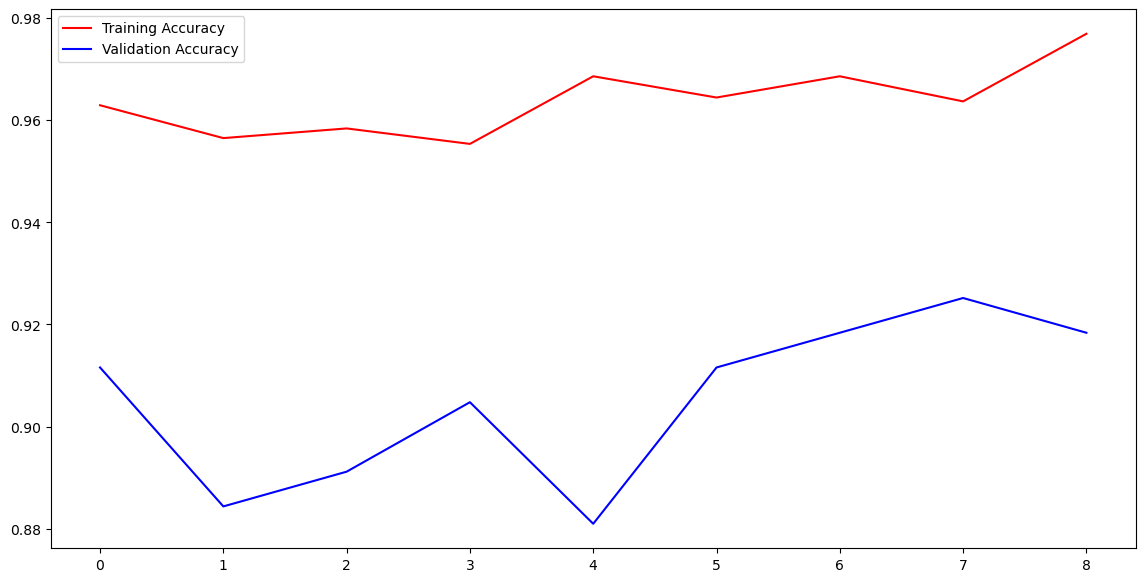

In [27]:
#model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

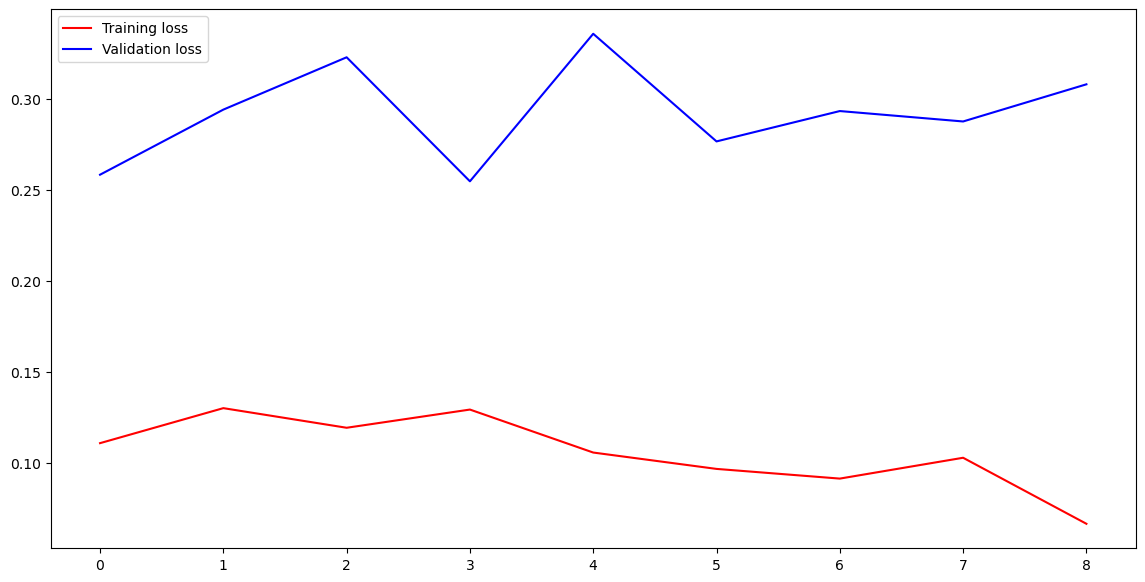

In [28]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [29]:
img = cv2.imread('../BrainTumor/Training/pituitary_tumor/p (107).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [30]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

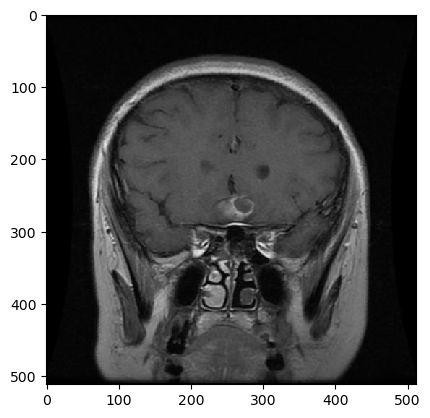

In [31]:
from tensorflow.keras.preprocessing import image
img = image.load_img('../BrainTumor/Training/pituitary_tumor/p (107).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [32]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 73ms/step


3

In [36]:
from keras.models import load_model
model.save('BrainTumor3.h5')

In [41]:
loaded_model = load_model('BrainTumor3.h5')
a = loaded_model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 187ms/step


3

In [42]:
import pickle

# Save training history
with open('BT3history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

In [44]:
import pickle

# Load training history
with open('BT3history.pkl', 'rb') as file:
    loaded_history = pickle.load(file)
    print(loaded_history)

{'loss': [0.11089301854372025, 0.13010485470294952, 0.11933983862400055, 0.12932853400707245, 0.10574065893888474, 0.09676025062799454, 0.09144239127635956, 0.10287637263536453, 0.06664737313985825], 'accuracy': [0.9629209041595459, 0.956488847732544, 0.9583806395530701, 0.9553537368774414, 0.9685962796211243, 0.9644343256950378, 0.9685962796211243, 0.9636776447296143, 0.9769201874732971], 'val_loss': [0.2582157552242279, 0.29393649101257324, 0.32265564799308777, 0.25459325313568115, 0.335557222366333, 0.27648845314979553, 0.29314935207366943, 0.28743240237236023, 0.3078210651874542], 'val_accuracy': [0.9115646481513977, 0.884353756904602, 0.8911564350128174, 0.9047619104385376, 0.8809523582458496, 0.9115646481513977, 0.918367326259613, 0.9251700639724731, 0.918367326259613]}
